# Level 2
## Task 1: Regression Model for House Price Prediction

In this notebook, we will train and evaluate three regression models for predicting house prices using the Boston Housing dataset. The following models will be tested:
- **Linear Regression**
- **Decision Tree Regressor**
- **Random Forest Regressor**

We will evaluate the performance of these models based on **Mean Squared Error (MSE)** and **R-squared (R²)**. Additionally, we will visualize the model's predicted values compared to the actual values and inspect residual distributions.


In [ ]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Detect paths
notebook_dir = os.getcwd()  # e.g., root/notebooks/
root_dir = os.path.abspath(os.path.join(notebook_dir, ".."))  # e.g., root/

# Show path info
print("- Notebook directory:", notebook_dir)
print("- Root directory:", root_dir)

# Ensure root_dir is in sys.path for module imports
if root_dir not in sys.path:
    sys.path.append(root_dir)
    print(f"- Added {root_dir} to sys.path")
else:
    print(f"- !!! {root_dir} already in sys.path")

# Verify if the cleaned dataset path exists
CLEANED_PATH = os.path.join(os.path.dirname(notebook_dir), "data", "cleaned", "house_prediction_cleaned.csv")

print(f"- Expected dataset path: {CLEANED_PATH}")

# Check if the file exists
if os.path.exists(CLEANED_PATH):
    print(f"- Dataset found at {CLEANED_PATH}")
else:
    print(f"- Dataset not found at {CLEANED_PATH}. Please check the file path.!!!")

# Directory for saving models
MODEL_DIR = os.path.join(root_dir, "models")
os.makedirs(MODEL_DIR, exist_ok=True)


Notebook directory: e:\CODveda\codveda-internship\notebooks
Root directory: e:\CODveda\codveda-internship
!!! e:\CODveda\codveda-internship already in sys.path
📂 Expected dataset path: e:\CODveda\codveda-internship\data\cleaned\house_prediction_cleaned.csv
Dataset found at e:\CODveda\codveda-internship\data\cleaned\house_prediction_cleaned.csv


### Dataset Loading

We will begin by loading the cleaned dataset. The dataset contains information about various features of houses, with the target variable being the median house value (MEDV). We will load the data and preview the first few rows.

In [11]:
def load_data():
    df = pd.read_csv(CLEANED_PATH)
    return df

# Load and preview data
df = load_data()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.496564,-0.487068,-0.557095,0.0,-0.708070,0.252183,0.410033,0.567526,-0.818617,-0.943926,-0.316899,0.440548,-0.487823,-0.092857
1,-0.496568,-0.487068,-0.557095,0.0,-0.708070,1.501743,-0.224054,0.567526,-0.818617,-0.943926,-0.316899,0.361627,-1.278277,1.529041
2,-0.495531,-0.487068,-1.277731,0.0,-0.807684,1.195895,-0.769084,1.124906,-0.696488,-1.068054,0.105255,0.396531,-1.446886,1.368089
3,-0.488038,-0.487068,-1.277731,0.0,-0.807684,1.439592,-0.469852,1.124906,-0.696488,-1.068054,0.105255,0.440548,-1.077183,1.714754
4,-0.496045,-0.487068,-1.277731,0.0,-0.807684,0.266903,-0.309549,1.124906,-0.696488,-1.068054,0.105255,0.386641,-1.095745,0.786187


### Feature Selection and Train-Test Split

Next, we will separate the features (X) and target variable (y), and split the dataset into training and testing sets (80% train, 20% test). The target variable is `MEDV`, which represents the median house value.

In [12]:
# Features and target variable
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training and Evaluation

We will now train and evaluate three regression models:
- **Linear Regression**
- **Decision Tree Regressor**
- **Random Forest Regressor**

For each model, we will calculate the **Mean Squared Error (MSE)** and **R-squared (R²)** to assess the model's performance.

In [13]:
# Models dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "R2": r2}
    
    # Save the trained model
    model_path = os.path.join(MODEL_DIR, f"{name.replace(' ', '_').lower()}.pkl")
    joblib.dump(model, model_path)

    # Predicted vs Actual plot
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{name}: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(MODEL_DIR, f"{name.replace(' ', '_').lower()}_actual_vs_predicted.png"))
    plt.close()

    # Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"{name}: Residual Distribution")
    plt.xlabel("Residuals")
    plt.tight_layout()
    plt.savefig(os.path.join(MODEL_DIR, f"{name.replace(' ', '_').lower()}_residuals.png"))
    plt.close()

# Display results
results


{'Linear Regression': {'MSE': 0.36153485246412775, 'R2': 0.6764997699939438},
 'Decision Tree': {'MSE': 0.3769557112389958, 'R2': 0.6627012348691574},
 'Random Forest': {'MSE': 0.17290852448236219, 'R2': 0.8452820051543937}}

### Results Overview

Here are the evaluation metrics for each model:
- **Mean Squared Error (MSE):** A measure of the average squared differences between predicted and actual values.
- **R-squared (R²):** The proportion of variance in the target variable that is explained by the model.

We'll display these metrics for each model to compare their performance.

In [14]:
# Convert results to DataFrame for a clean presentation
results_df = pd.DataFrame(results).T
results_df

,MSE,R2
Linear Regression,0.361535,0.676500
Decision Tree,0.376956,0.662701
Random Forest,0.172909,0.845282


### Model Performance Visualizations

We will now visualize the model's performance by plotting:
- **Predicted vs. Actual Prices**
- **Residuals Distribution**

These plots help us assess how well the models are predicting house prices and whether there are any patterns in the residuals.

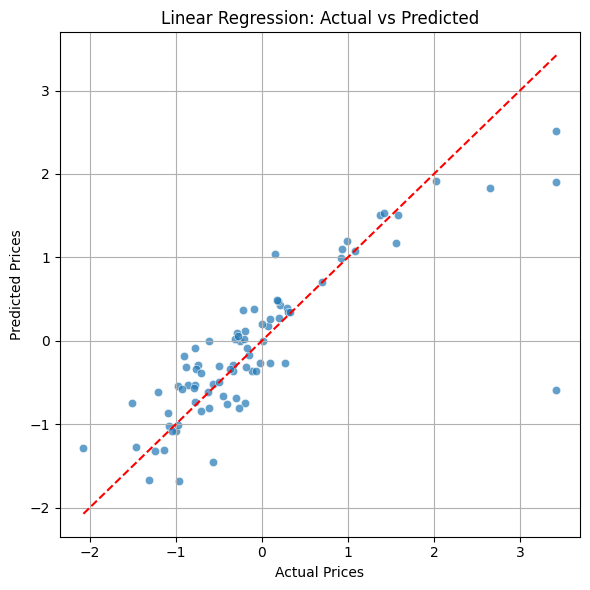

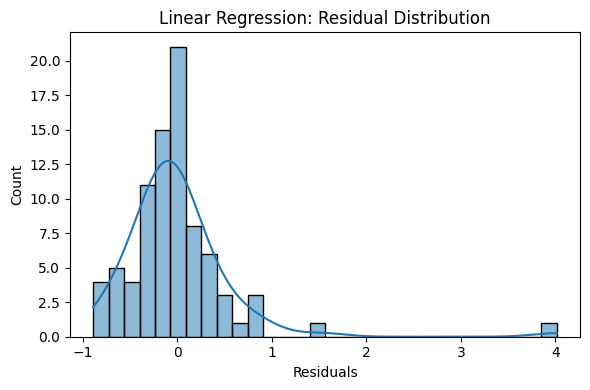

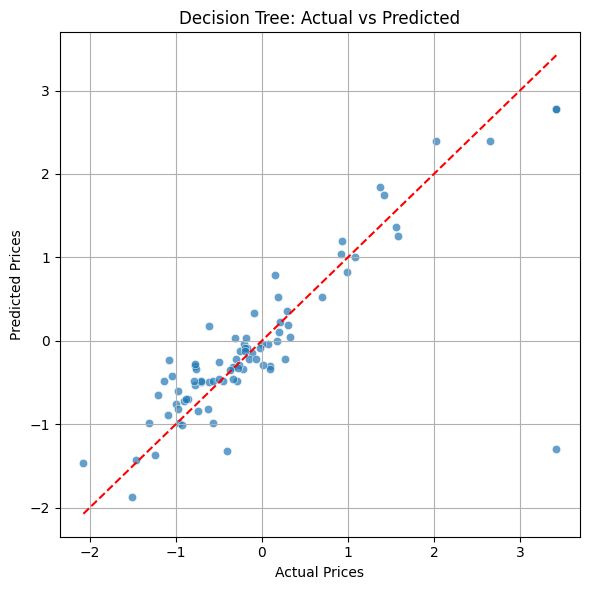

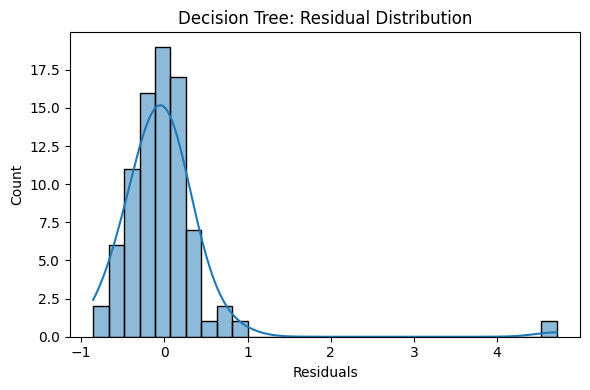

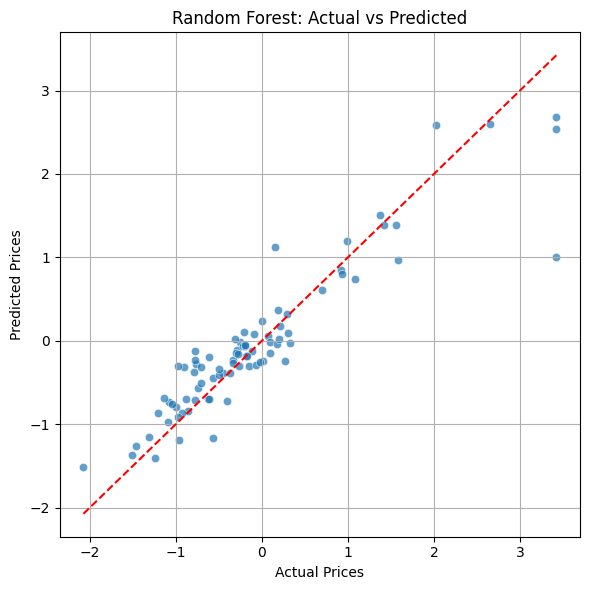

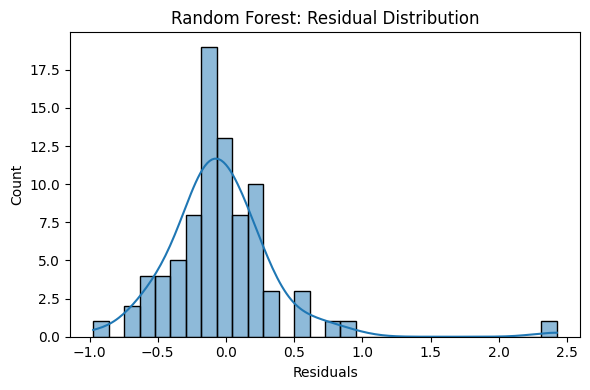

In [15]:
# Generate plots for each model
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Predicted vs Actual plot
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{name}: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"{name}: Residual Distribution")
    plt.xlabel("Residuals")
    plt.tight_layout()
    plt.show()


### Conclusion

In this notebook, we trained and evaluated three regression models (Linear Regression, Decision Tree, and Random Forest) for house price prediction. The results and visualizations help us understand how well each model is performing.

- **Linear Regression** is fast and interpretable but might not capture complex relationships well.
- **Decision Tree** can model non-linear relationships but is prone to overfitting.
- **Random Forest** generally performs well due to its ensemble nature and ability to capture non-linear relationships.

Based on the performance metrics (MSE and R²) and visualizations, you can select the best model for house price prediction.